## Ansys Polyflow Blow Molding Simulation Results

### Colab Adjustments

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Python_Projects/Optimization_of_Parison_Thickness

/content/gdrive/MyDrive/Python_Projects/Optimization_of_Parison_Thickness


### Importing Packages

In [3]:
import pandas as pd
import numpy as np
import sympy as sp
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

### Loading Results

In [4]:
first_start = pd.read_csv("Ansys-Polyflow-Results/1st_iteration_start.csv")
first_final = pd.read_csv("Ansys-Polyflow-Results/1st_iteration_final.csv")

In [5]:
second_start = pd.read_csv("Ansys-Polyflow-Results/2nd_iteration_start.csv")
second_final = pd.read_csv("Ansys-Polyflow-Results/2nd_iteration_final.csv")

In [6]:
third_start = pd.read_csv("Ansys-Polyflow-Results/3rd_iteration_start.csv")
third_final = pd.read_csv("Ansys-Polyflow-Results/3rd_iteration_final.csv")

In [7]:
fourth_start = pd.read_csv("Ansys-Polyflow-Results/4th_iteration_start.csv")
fourth_final = pd.read_csv("Ansys-Polyflow-Results/4th_iteration_final.csv")

### Comparing Parison Thicknesses of Iterations

In [8]:
def average_thickness(dataframe):
  thickness = dataframe[' THICKNESS [ m ]'].to_numpy()
  average_thickness = float(np.average(thickness))
  return average_thickness

In [9]:
average_thicknesses =  [average_thickness(first_start), average_thickness(second_start), \
                        average_thickness(third_start), average_thickness(fourth_start)]

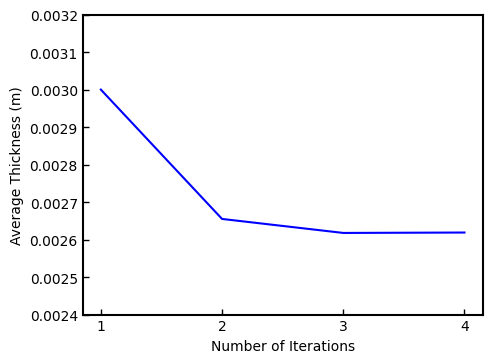

In [10]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(4, 3))
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["figure.autolayout"] = True

ax = fig.add_axes([0,0,1,1])
ax.set_ylim(0.0024, 0.0032)

ax.xaxis.set_tick_params(which='major', size=4, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=4, width=1, direction='in')

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Average Thickness (m)')
ax.plot(range(1,5,1), average_thicknesses, color='blue', linewidth=1.5)
ax.set_xticks(range(1,5,1))
fig.show()

### Parison Thickness Distribution

In [11]:
first_iteration = np.sort(first_final[' THICKNESS [ m ]'].to_numpy()*1000)
second_iteration = np.sort(second_final[' THICKNESS [ m ]'].to_numpy()*1000)
third_iteration = np.sort(third_final[' THICKNESS [ m ]'].to_numpy()*1000)
fourth_iteration = np.sort(fourth_final[' THICKNESS [ m ]'].to_numpy()*1000)

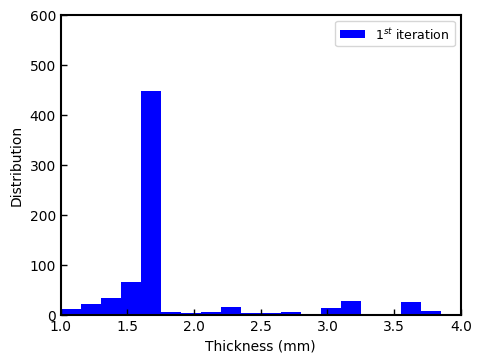

In [12]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(4, 3))
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["figure.autolayout"] = True

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(1, 4)
ax.set_ylim(0, 600)


ax.xaxis.set_tick_params(which='major', size=4, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=4, width=1, direction='in')

ax.set_xlabel('Thickness (mm)')
ax.set_ylabel('Distribution')
bins = np.arange(1,6,0.15)
ax.hist(first_iteration, color='blue', bins=bins, label='$1^{st}$ iteration', linewidth=1.5)
plt.legend(loc='upper right', prop={'size': 9})

fig.show()

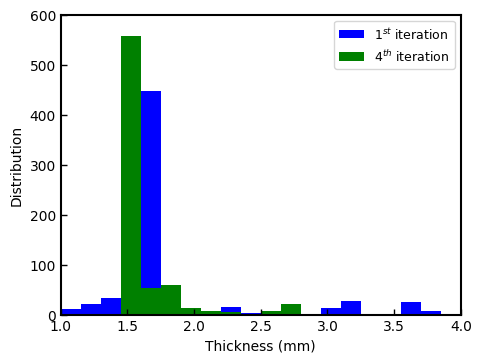

In [13]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(4, 3))
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["figure.autolayout"] = True

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(1, 4)
ax.set_ylim(0, 600)

ax.xaxis.set_tick_params(which='major', size=4, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=4, width=1, direction='in')

ax.set_xlabel('Thickness (mm)')
ax.set_ylabel('Distribution')
bins = np.arange(1,6,0.15)
ax.hist(first_iteration, color='blue', bins=bins, label='$1^{st}$ iteration', linewidth=1.5)
ax.hist(third_iteration, color='green', bins=bins, label='$4^{th}$ iteration', linewidth=1.5)
plt.legend(loc='upper right', prop={'size': 9})
fig.show()

### Improvement in Raw Material Use

In [14]:
parison_area = np.sum(fourth_start[' Area [ m^2 ]'].to_numpy())# in m2

In [15]:
first_iteration_thickness = average_thickness(first_start) # in meters

In [16]:
fourth_iteration_thickness = average_thickness(fourth_start)# in meters

Raw material usage in the first iteration before parison thickness optimization

In [17]:
first_volume = parison_area*first_iteration_thickness

In [18]:
density = 900 #kg/m^3

In [19]:
first_weight = density * first_volume

In [20]:
print('Raw material usage before the parison proggraming: {:.3f} kg'.format(first_weight))

Raw material usage before the parison proggraming: 0.015 kg


Raw material usage in the first iteration before parison thickness optimization

In [21]:
fourth_volume = parison_area*fourth_iteration_thickness

In [22]:
fourth_weight = density * fourth_volume

In [23]:
print('Raw material usage before the parison proggraming: {:.3f} kg'.format(fourth_weight))

Raw material usage before the parison proggraming: 0.013 kg


In [24]:
raw_material_improvement = (1 - fourth_weight/first_weight)*100

In [25]:
print('After the parison thickness optimization, raw material usage is decreased by {:.3f} %'.format(raw_material_improvement ))

After the parison thickness optimization, raw material usage is decreased by 12.706 %
